In [31]:

import gensim, spacy
import gensim.corpora as corpora
from nltk.corpus import stopwords

import pandas as pd
import numpy as np
import re
from tqdm import tqdm
import time

import pyLDAvis
import pyLDAvis.gensim  # don't skip this
# import matplotlib.pyplot as plt
# %matplotlib inline

## Setup nlp for spacy
nlp = spacy.load("en_core_web_sm")

# Load NLTK stopwords
stop_words = stopwords.words('english')
# Add some extra words in it if required
stop_words.extend(['from', 'subject', 'use','pron', 'covid','sars','coronavirus','pandemic']) ########################### AFEGIR AQUI ELS STOPWORDS QUE VULGUIS

In [32]:

# pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl


In [74]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool

In [76]:
result = pd.concat([data, data_test], axis=0)
result=result[result['abstract'].str.len()>30]
result=result.reset_index().drop(columns='index')
result['abstract']=result['abstract'].astype(str)
result=result.reset_index().drop(columns='index')
result = result[0:39000]

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool

In [77]:
result.shape

(39000, 12)

In [78]:
df = result[['pmid','abstract','label']]

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool

In [79]:
data = result.abstract.values.tolist()

In [80]:
# Drop for the definitive version


In [81]:
# Remove Emails
data = [re.sub('S*@S*s?', '', sent) for sent in data]
# Remove new line characters and extra space
data = [re.sub('s+', ' ', sent) for sent in data]
# Remove single quotes
data = [re.sub("'", "", sent) for sent in data]

### Lemmatization
data_lemma = []
for txt in tqdm(data):
    lis = []
    doc = nlp(txt)
    for token in doc:
        lis.append(token.lemma_)
    data_lemma.append(' '.join(lis))

### Tokenization and gensim stopword removal

# You can look for all gensim stopwords by running -> 'gensim.parsing.preprocessing.STOPWORDS'

# Function to tokenize
# Also remove words whose length less than 3 (you can chang it)
def tokenization_with_gen_stop(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)

    return result

## Apply tokenization function
data_words = []
for txt in tqdm(data_lemma):
    data_words.append(tokenization_with_gen_stop(txt))

### NLTK Stopword removal (extra stopwords)

data_words_clean = []
for word in tqdm(data_words):
    wrd = []
    for w in word:
        if w not in stop_words:
            wrd.append(w)
    data_words_clean.append(wrd)

100%|██████████████████████████████████████████████████████████████████████████| 39000/39000 [00:13<00:00, 2806.34it/s]


In [82]:
# Create Dictionary
dictionary = corpora.Dictionary(data_words_clean)
# Print dictionary
print(dictionary.token2id)

## Create Term document frequency (corpus)
# Term Document Frequency
corpus = [dictionary.doc2bow(text) for text in data_words_clean]
# Print corpus for first document
print(corpus[0])

{'activation': 0, 'actually': 1, 'acute': 2, 'antibodie': 3, 'antibody': 4, 'cell': 5, 'characteri': 6, 'circumvent': 7, 'clinical': 8, 'concern': 9, 'conduct': 10, 'coronaviru': 11, 'critical': 12, 'critically': 13, 'currently': 14, 'cytokine': 15, 'death': 16, 'dependent': 17, 'develop': 18, 'development': 19, 'difficult': 20, 'drug': 21, 'early': 22, 'effective': 23, 'electively': 24, 'enhancement': 25, 'evere': 26, 'everity': 27, 'global': 28, 'health': 29, 'high': 30, 'highly': 31, 'human': 32, 'ideration': 33, 'idere': 34, 'illne': 35, 'inhibit': 36, 'inhibitor': 37, 'literature': 38, 'major': 39, 'mammalian': 40, 'memory': 41, 'mortality': 42, 'mtor': 43, 'need': 44, 'occurrence': 45, 'ociate': 46, 'pathogenic': 47, 'patient': 48, 'pecific': 49, 'peculate': 50, 'piratory': 51, 'prevent': 52, 'priority': 53, 'production': 54, 'propo': 55, 'public': 56, 'rapamycin': 57, 'rate': 58, 'reactive': 59, 'recommend': 60, 'reduce': 61, 'review': 62, 'tage': 63, 'target': 64, 'tematical': 

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 2), (38, 1), (39, 2), (40, 1), (41, 1), (42, 2), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 3), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1)]


In [83]:
# Easy to observe format of corpus
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('activation', 1),
  ('actually', 1),
  ('acute', 1),
  ('antibodie', 2),
  ('antibody', 1),
  ('cell', 1),
  ('characteri', 1),
  ('circumvent', 1),
  ('clinical', 1),
  ('concern', 1),
  ('conduct', 1),
  ('coronaviru', 2),
  ('critical', 1),
  ('critically', 1),
  ('currently', 1),
  ('cytokine', 2),
  ('death', 1),
  ('dependent', 1),
  ('develop', 1),
  ('development', 1),
  ('difficult', 1),
  ('drug', 1),
  ('early', 1),
  ('effective', 1),
  ('electively', 1),
  ('enhancement', 1),
  ('evere', 3),
  ('everity', 2),
  ('global', 1),
  ('health', 1),
  ('high', 1),
  ('highly', 1),
  ('human', 1),
  ('ideration', 1),
  ('idere', 1),
  ('illne', 2),
  ('inhibit', 1),
  ('inhibitor', 2),
  ('literature', 1),
  ('major', 2),
  ('mammalian', 1),
  ('memory', 1),
  ('mortality', 2),
  ('mtor', 2),
  ('need', 1),
  ('occurrence', 1),
  ('ociate', 1),
  ('pathogenic', 1),
  ('patient', 2),
  ('pecific', 1),
  ('peculate', 1),
  ('piratory', 1),
  ('prevent', 3),
  ('priority', 1),
  (

In [84]:
start_time = time.time()
##
NUM_TOPICS = 8
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary,random_state=100,passes=10)
# Saving trained model
ldamodel.save('LDA_NYT')
# Loading trained model
ldamodel = gensim.models.ldamodel.LdaModel.load('LDA_NYT')
## Print time taken to train the model
print("--- %s seconds ---" % (time.time() - start_time))

--- 201.89404296875 seconds ---


In [85]:
start_time = time.time()
##
## Multicore LDA
NUM_TOPICS = 7
lda_multicore_model = gensim.models.ldamulticore.LdaMulticore(corpus, num_topics = NUM_TOPICS, id2word=dictionary,random_state=100,passes=10)
# Saving trained model
lda_multicore_model.save('LDA_multicore')
# Loading trained model
lda_multicore_model = gensim.models.ldamodel.LdaModel.load('LDA_multicore')
## Print time taken to train the model
print("--- %s seconds ---" % (time.time() - start_time))

--- 120.47116041183472 seconds ---


In [86]:
# See the topics
ldamodel.print_topics(-1)

[(0,
  '0.021*"health" + 0.015*"tudy" + 0.013*"mental" + 0.012*"anxiety" + 0.012*"ocial" + 0.012*"urvey" + 0.011*"participant" + 0.010*"ychological" + 0.009*"high" + 0.009*"report"'),
 (1,
  '0.069*"patient" + 0.015*"group" + 0.014*"tudy" + 0.012*"pital" + 0.012*"outcome" + 0.012*"high" + 0.011*"mortality" + 0.010*"analy" + 0.009*"compare" + 0.009*"clinical"'),
 (2,
  '0.028*"drug" + 0.023*"treatment" + 0.016*"trial" + 0.012*"clinical" + 0.010*"antiviral" + 0.010*"potential" + 0.009*"coronaviru" + 0.009*"therapeutic" + 0.009*"effect" + 0.009*"anti"'),
 (3,
  '0.019*"care" + 0.016*"health" + 0.013*"patient" + 0.007*"healthcare" + 0.007*"provide" + 0.007*"medical" + 0.007*"need" + 0.006*"ervice" + 0.006*"challenge" + 0.006*"management"'),
 (4,
  '0.036*"patient" + 0.019*"piratory" + 0.018*"acute" + 0.018*"evere" + 0.017*"coronaviru" + 0.017*"infection" + 0.013*"yndrome" + 0.009*"lung" + 0.009*"cular" + 0.009*"report"'),
 (5,
  '0.025*"viru" + 0.021*"coronaviru" + 0.015*"human" + 0.014*"c

In [87]:
# Compute Perplexity Score
print('nPerplexity Score: ', ldamodel.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=data_words_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)

nPerplexity Score:  -7.479389206288767
nCoherence Score:  0.5398342755122293


In [88]:
# To plot at Jupyter notebook
pyLDAvis.enable_notebook()
plot = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
# Save pyLDA plot as html file
pyLDAvis.save_html(plot, 'LDA_NYT.html')
plot

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.006118 -0.145689       1        1  22.502412
1     -0.171998  0.135007       2        1  14.397924
7     -0.053079 -0.123187       3        1  14.045690
4      0.070946  0.177273       4        1  11.794962
6     -0.084941  0.151788       5        1  10.120586
5      0.191763 -0.028612       6        1   9.940273
0     -0.181918 -0.149476       7        1   9.814955
2      0.223109 -0.017104       8        1   7.383199, topic_info=             Term          Freq         Total Category  logprob  loglift
48        patient  78622.000000  78622.000000  Default  30.0000  30.0000
21           drug   8024.000000   8024.000000  Default  29.0000  29.0000
184     treatment  15346.000000  15346.000000  Default  28.0000  28.0000
29         health  28878.000000  28878.000000  Default  27.0000  27.0000
51       piratory  18455.000000  18455.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
153     infection   1533.982168  27239.661521   Topic8  -5.2132  -0.2708
1012  interaction   1091.918183   2510.790229   Topic8  -5.5532   1.7733
75          afety   1114.890695   3529.010355   Topic8  -5.5323   1.4537
1070      protein   1158.346795   6711.648838   Topic8  -5.4941   0.8491
237       include   1161.757862  17784.400994   Topic8  -5.4912  -0.1224

[622 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1674      5  0.993663    abbott
1002      1  0.833273      acce
1002      2  0.021147      acce
1002      3  0.027144      acce
1002      6  0.044504      acce
...     ...       ...       ...
73        6  0.225008   yndrome
73        8  0.053169   yndrome
2638      7  0.994574     youth
4986      8  0.997594      zinc
601       6  0.998575  zoonotic

[1456 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 8, 5, 7, 6, 1, 3])

In [89]:
topics = ldamodel[corpus]

In [90]:
all_topics_csr = gensim.matutils.corpus2csc(topics)
all_topics_numpy = all_topics_csr.T.toarray()

In [91]:
np.argmax(all_topics_numpy, axis = 1)

array([4, 7, 4, ..., 7, 3, 3], dtype=int64)

In [92]:
df['cluster'] = np.argmax(all_topics_numpy, axis = 1)

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool

In [93]:
df

,pmid,abstract,label,cluster
0,32410266,Coronavirus disease 2019 (COVID-19) has become...,Treatment;Mechanism,4
1,33052950,This paper uses resilience as a lens through w...,NaN,7
2,32589531,Pulmonary embolism remains an important cause ...,Prevention,4
3,32835070,The months from March to June refer as water c...,NaN,7
4,32620125,BACKGROUND: The novel coronavirus disease 2019...,Treatment;Diagnosis,1
...,...,...,...,...
38995,32978602,Pseudotyped viruses are useful virological too...,Treatment;Diagnosis,5
38996,32838048,"COVID-19, the acute respiratory tract infectio...",Treatment;Mechanism,4
38997,32160889,"In December 2019, a new virus (initially calle...",Prevention,7
38998,32802428,Background: We previously reported that we dev...,Prevention,3


In [95]:
labels = result[['label']]

labels2 = pd.concat([labels.drop('label', 1), labels['label'].str.get_dummies(sep=";")], 1)

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool

In [96]:
labels2

,Case Report,Diagnosis,Epidemic Forecasting,General Info,Mechanism,Prevention,Transmission,Treatment
0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
38995,0,1,0,0,0,0,0,1
38996,0,0,0,0,1,0,0,1
38997,0,0,0,0,0,1,0,0
38998,0,0,0,0,0,1,0,0


In [97]:
labels2['cluster']=df['cluster']

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool

In [98]:
labels2

,Case Report,Diagnosis,Epidemic Forecasting,General Info,Mechanism,Prevention,Transmission,Treatment,cluster
0,0,0,0,0,1,0,0,1,4
1,0,0,0,0,0,0,0,0,7
2,0,0,0,0,0,1,0,0,4
3,0,0,0,0,0,0,0,0,7
4,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
38995,0,1,0,0,0,0,0,1,5
38996,0,0,0,0,1,0,0,1,4
38997,0,0,0,0,0,1,0,0,7
38998,0,0,0,0,0,1,0,0,3


In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool

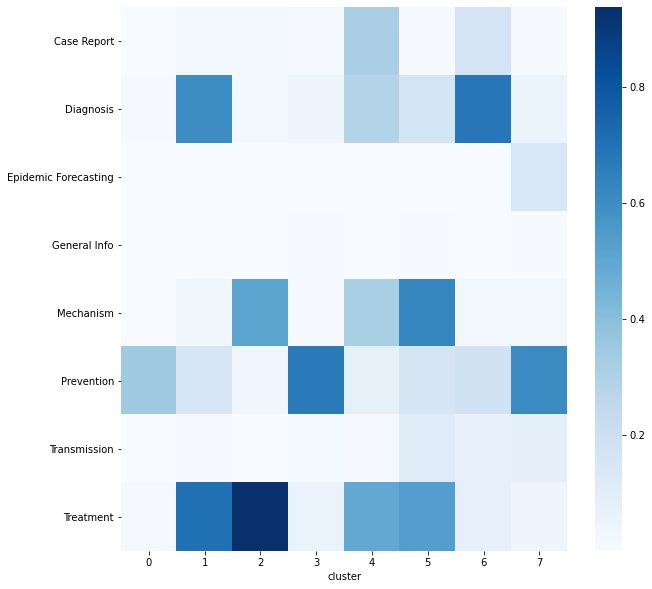

In [102]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(labels2.groupby('cluster').mean().T, cmap='Blues')